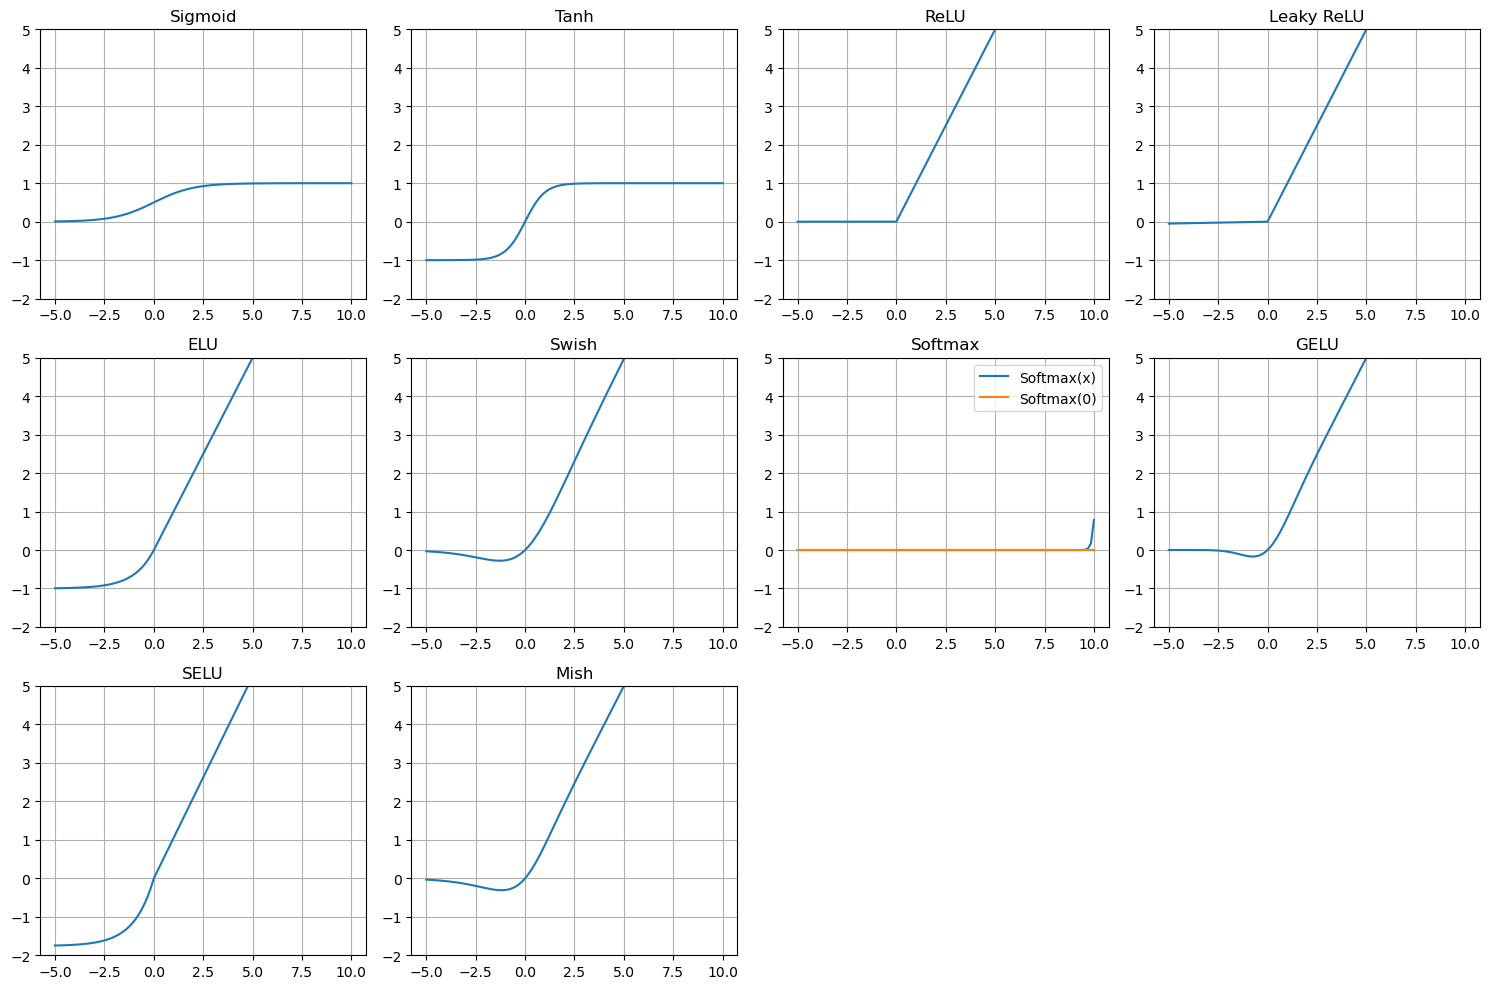

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def swish(x, beta=1.0):  # Swish 函数引入了 beta 参数
    return x * sigmoid(beta * x)

def softmax(x, temperature=1.0):
    """
    带有温度参数的 Softmax 函数，用于调整缩放。

    Args:
        x: 输入数组。
        temperature: 温度参数，用于调整缩放。

    Returns:
        Softmax 输出。
    """
    x = np.array(x) / temperature  # 应用温度参数
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

def selu(x, scale=1.0507, alpha=1.67326):
    return scale * np.where(x > 0, x, alpha * (np.exp(x) - 1))

def mish(x):
    return x * np.tanh(np.log(1 + np.exp(x)))

def plot_activation_functions(x):
    functions = {
        "Sigmoid": sigmoid,
        "Tanh": tanh,
        "ReLU": relu,
        "Leaky ReLU": leaky_relu,
        "ELU": elu,
        "Swish": swish,
        "Softmax": lambda x: softmax(x, temperature=0.1),  # 调整温度参数
        "GELU": gelu,
        "SELU": selu,
        "Mish": mish,
    }

    plt.figure(figsize=(15, 10))
    for i, (name, func) in enumerate(functions.items(), 1):
        plt.subplot(3, 4, i)
        if name == "Softmax":
            y = func(np.array([x, np.zeros_like(x)]))
            plt.plot(x, y[0], label="Softmax(x)")
            plt.plot(x, y[1], label="Softmax(0)")
            plt.legend()
        else:
            plt.plot(x, func(x))
        plt.title(name)
        plt.grid(True)
        plt.ylim(-2, 5)

    plt.tight_layout()
    plt.show()

# 生成 x 值
x = np.linspace(-10, 10, 100)
# 绘制激活函数图像
plot_activation_functions(x)